# скрипт #04 v2
<hr>

# страндарные библиотеки для работы

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

from IPython.core.display import HTML

In [2]:
# sklearn packages
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

In [3]:
fileNames=['rawDataFull1001.csv', 'rawDataFull1003.csv', 
            'rawDataFull1004.csv', 'rawDataFull1005.csv',
            'rawDataFull1006.csv']
path='../ITC RUSAL/baths_v2/'
bathNumber=['1001','1003','1004','1005','1006']

In [4]:
# data[0] - 1001, 1 - 1003, 2 - 1004, 3 - 1005, 4 - 1006
data=[]
for dataset in fileNames:
    data.append(pd.read_csv(path+dataset))

In [5]:
# удалить столбец "KOL4", т.к. он пустой по всех 5ти наборах
for i in range(5):
    data[i]=data[i].drop(columns=['KOL4'])

In [6]:
fullNames=['АЭ: длит. <Сред.>', 'АЭ: кол-во <Сред.>', 'АЭ: напр. ср.м. <Сред.>(В)',
            'Время в недопитке <Сред.> (час)', 'Время в номинале <Сред.> (час)',
            'Время  в перепитке <Сред.> (час)', 'Время в тесте <Сред.> (час)', 
            'Время на голод. <Сред.> (час)', 'Кол-во доз АПГ в недопитке <Сумма> (шт.)',
            'Кол-во доз АПГ в номинале <Сумма> (шт.)', 'Кол-во доз АПГ в перепитке <Сумма> (шт.)',
            'Кол-во доз АПГ в тесте <Сумма> (шт.)', 'Напр. зад. <Сред.> (В)', 'Напр. эл-ра <Сред.> (В)',
            'Настыль: длина <Сред.> (см)', 'Подина: состояние <Сред.> (оц.)', 
            'РМПР: длит. ВИРА <Сред.> (сек)', 'РМПР: длит. МАЙНА <Сред.> (сек)', 
            'РМПР: коэфф. <Сред.>', 'РМПР: кол-во ВИРА <Сред.> (шт)', 'РМПР: кол-во МАЙНА <Сред.> (шт)',
            'Эл-лит: темп-ра <Сред.> (°C)', 'Металл: уровень <Сред.> (см)', 'Эл-лит: уровень <Сред.> (см)', 
            'Шум <Сред.> (В)', 'Эл-лит: CaF2 <Сред.> (%)', 'Эл-лит: КО <Сред.>', 'AlF3: добавка <Сред.> (кг)',
            'Напр. анода <Сред.> (В)' ]
fullNames_2=['Выход на в.сутки: Кр/весы <Сред.> (кг)', 'Выход на в.сутки: Л/О <Сред.> (кг)',
            'Выход на в.сутки: по заданию <Сред.> (кг)', 'Выход по току: Л/О <Сред.> (%)',
            'Ток серии (АСУТП) <Сред.> (кА)']

In [7]:
fullNames.remove('Кол-во доз АПГ в тесте <Сумма> (шт.)')
fullNamesInRussian=fullNames+fullNames_2

##  нормализуем в $[0,1]$

In [8]:
dataScaled=[]
for i in range(5):
    x=data[i].values
    scaler = preprocessing.MinMaxScaler()
    x_scaled = scaler.fit_transform(x)
    dataScaled.append( pd.DataFrame(x_scaled, columns=data[i].columns.values) )

## заполним пропусти средним и с помощью метода kNN: k=3

In [9]:
dataScImpMean=[]
for i in range(5):
    impMean = SimpleImputer(missing_values=np.nan, strategy='mean')
    dataScImpMean.append( pd.DataFrame(impMean.fit_transform(dataScaled[i]), columns=dataScaled[i].columns.values) )

dataScImpMKNN3=[]
for i in range(5):
    impKNN3 = KNNImputer(missing_values=np.nan, n_neighbors=3)
    dataScImpMKNN3.append( pd.DataFrame(impKNN3.fit_transform(dataScaled[i]), columns=dataScaled[i].columns.values) )

## массив 5-в-1 c пропусками и заполненный

In [10]:
data5in1=dataScaled[0].copy()
for i in range(4):
    data5in1=data5in1.append(dataScaled[i+1], ignore_index=True)
data5in1.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Columns: 33 entries, AE1 to CURRENT2
dtypes: float64(33)
memory usage: 470.6 KB


In [11]:
impMean = SimpleImputer(missing_values=np.nan, strategy='mean')
data5ni1Mean=pd.DataFrame(impMean.fit_transform(data5in1), columns=data5in1.columns.values)
impKNN3 = KNNImputer(missing_values=np.nan, n_neighbors=3)
data5ni1KNN3=pd.DataFrame(impKNN3.fit_transform(data5in1), columns=data5in1.columns.values)

# дендограммы

In [12]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [13]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    sch.dendrogram(linkage_matrix, **kwargs)

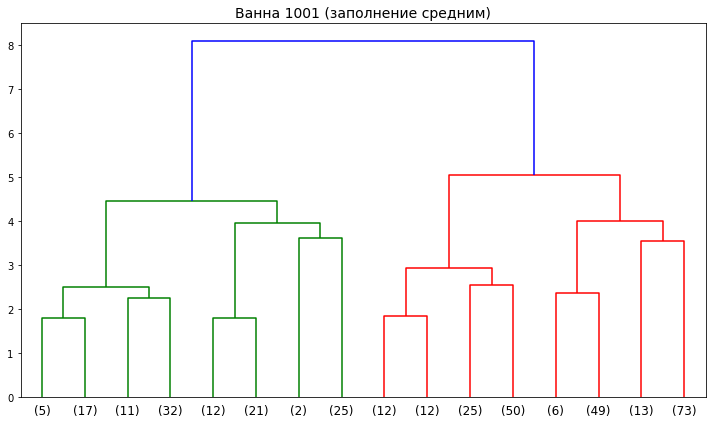

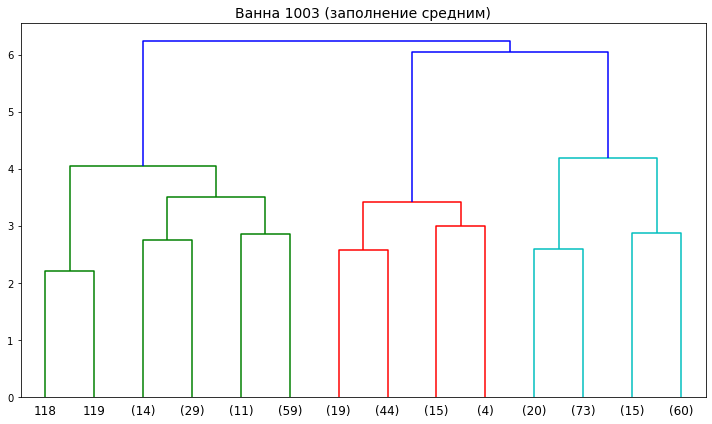

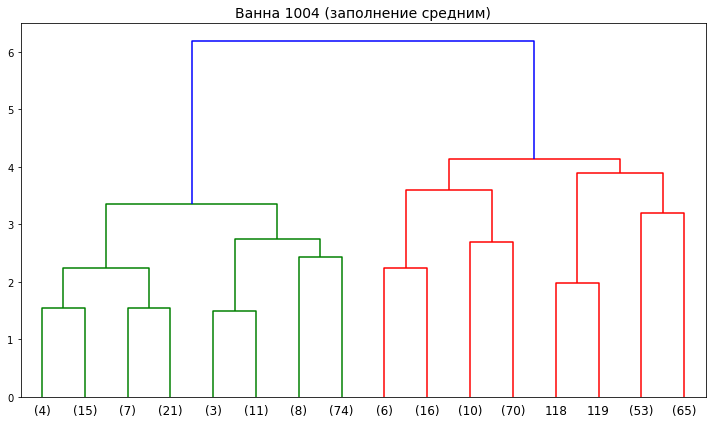

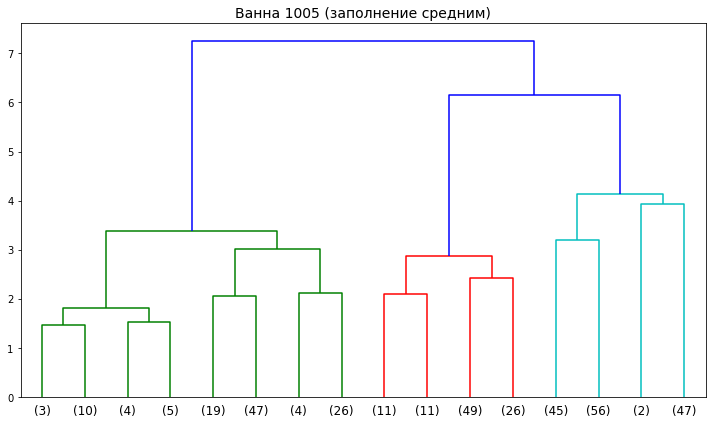

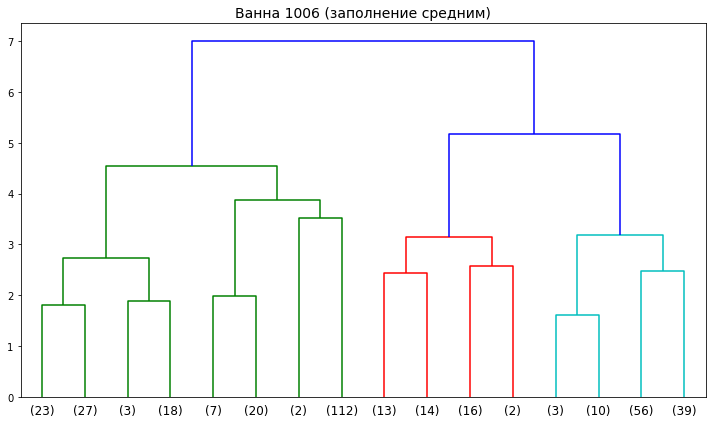

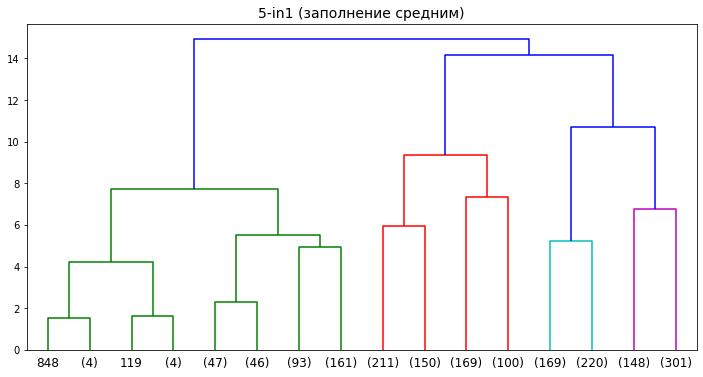

In [19]:
for i in range(5):
    model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
    model = model.fit(dataScImpMean[i].values)
    fig, ax = plt.subplots(figsize=(10,6))
    ax.set_title('Ванна '+bathNumber[i]+' (заполнение средним)', fontsize=14)
    plot_dendrogram(model, truncate_mode='level', p=3)
    plt.tight_layout()
    plt.savefig('report_v2/dendoClustersMean'+str(bathNumber[i])+'.png', dpi=300, bbox_inches='tight')    
    plt.show()

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(data5ni1Mean.values)
fig, ax = plt.subplots(figsize=(12,6))
ax.set_title('5-in1 (заполнение средним)', fontsize=14)
plot_dendrogram(model, truncate_mode='level', p=3)
plt.savefig('report_v2/dendoClustersMean5in1.png', dpi=300, bbox_inches='tight')   
plt.show()

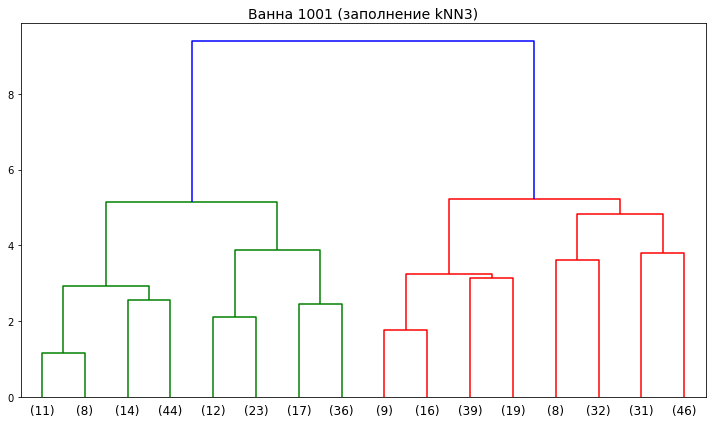

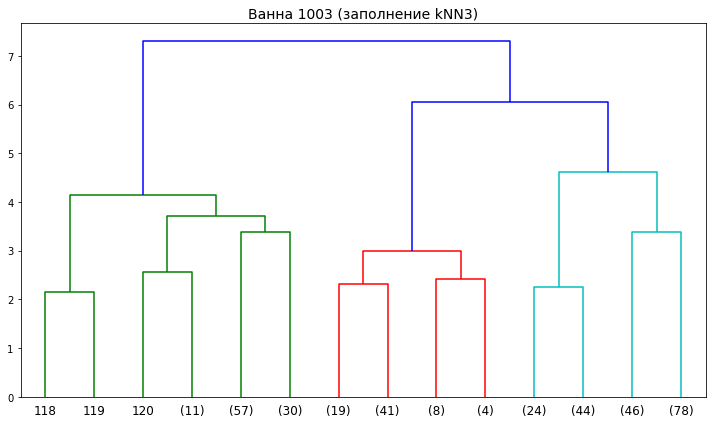

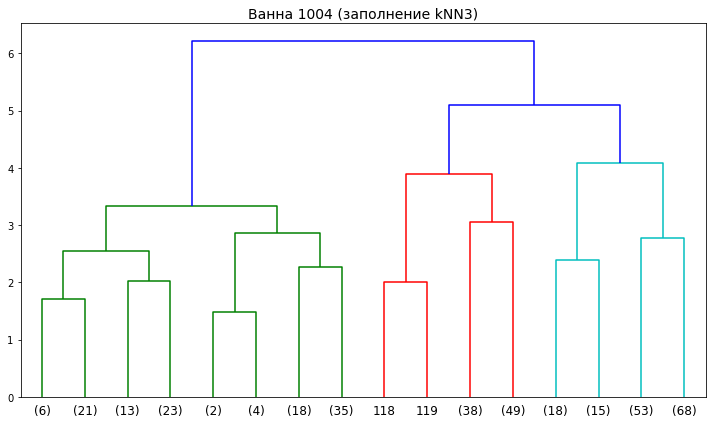

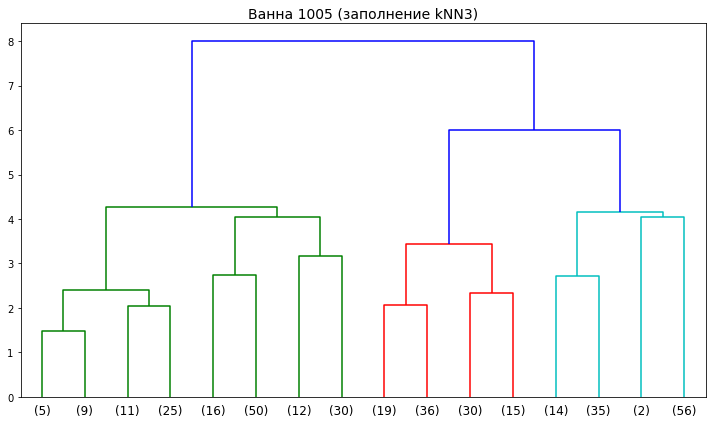

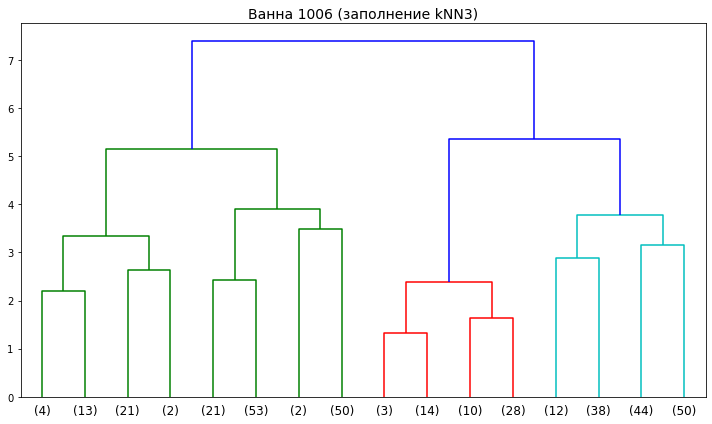

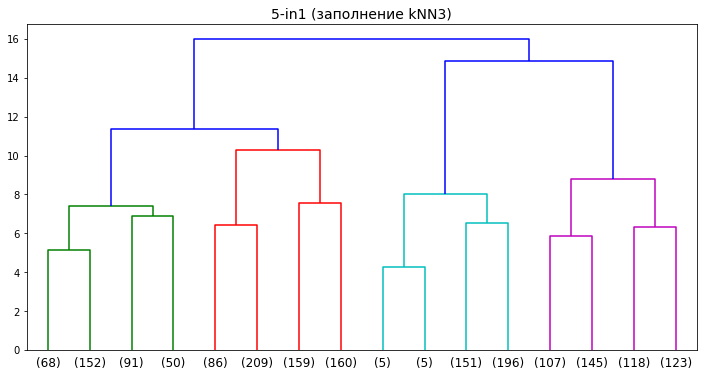

In [20]:
for i in range(5):
    model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
    model = model.fit(dataScImpMKNN3[i].values)
    fig, ax = plt.subplots(figsize=(10,6))
    ax.set_title('Ванна '+bathNumber[i]+' (заполнение kNN3)', fontsize=14)
    plot_dendrogram(model, truncate_mode='level', p=3)
    plt.tight_layout()
    plt.savefig('report_v2/dendoClusterskNN'+str(bathNumber[i])+'.png', dpi=300, bbox_inches='tight')      
    plt.show()

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(data5ni1KNN3.values)
fig, ax = plt.subplots(figsize=(12,6))
ax.set_title('5-in1 (заполнение kNN3)', fontsize=14)
plot_dendrogram(model, truncate_mode='level', p=3)
plt.savefig('report_v2/dendoClustersMkNN5in1.png', dpi=300, bbox_inches='tight')  
plt.show()

# данные с интерполяцией пропусков

In [16]:
fileNames=['interpolateDataBath1001.csv', 'interpolateDataBath1003.csv', 
            'interpolateDataBath1004.csv', 'interpolateDataBath1005.csv',
            'interpolateDataBath1006.csv', 'interpolateData5in1.csv']
path='../ITC RUSAL/baths_v2/'
bathNumber=['1001','1003','1004','1005','1006']

In [17]:
# data[0] - 1001, 1 - 1003, 2 - 1004, 3 - 1005, 4 - 1006
data=[]
for dataset in fileNames:
    data.append(pd.read_csv(path+dataset))


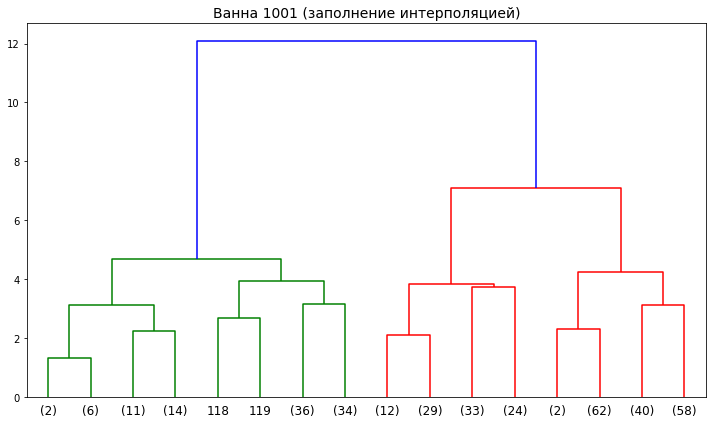

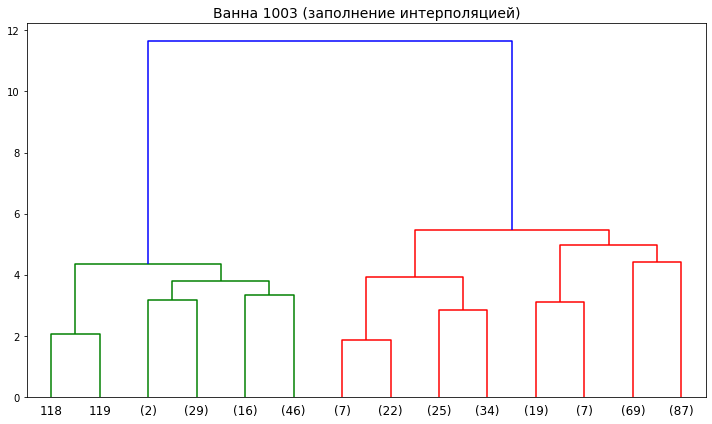

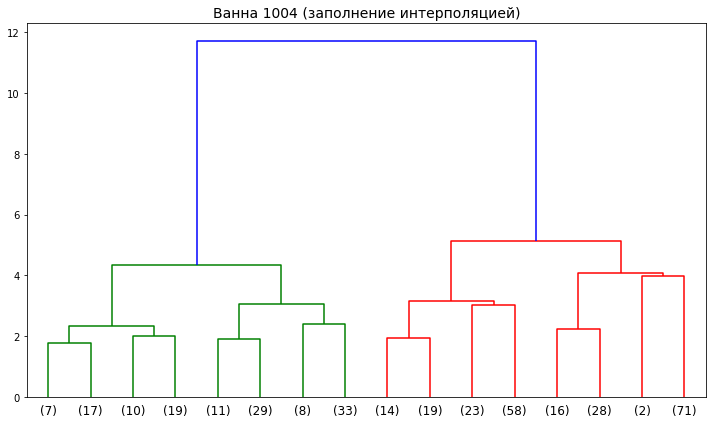

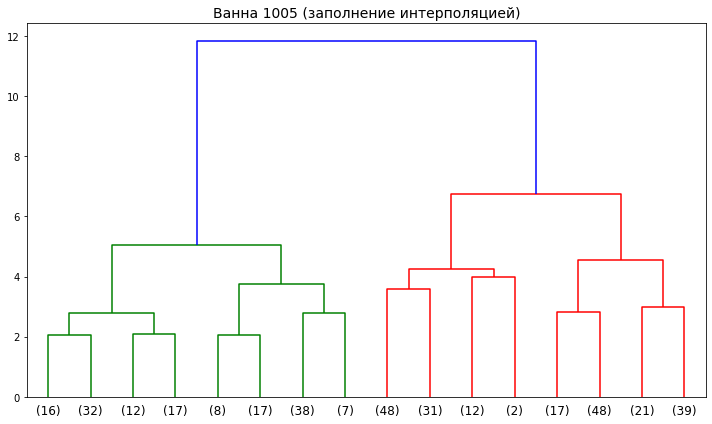

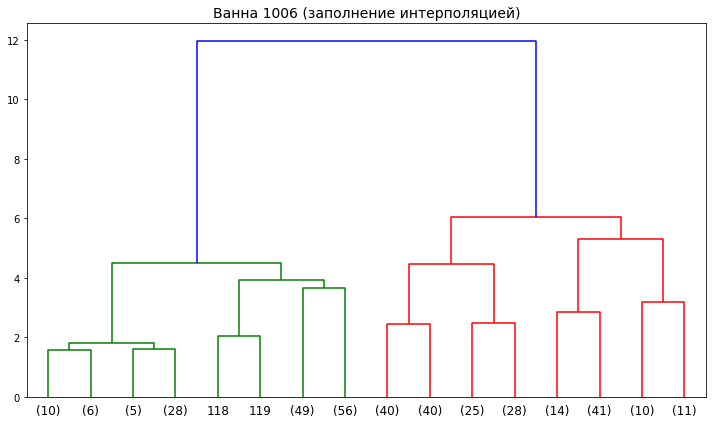

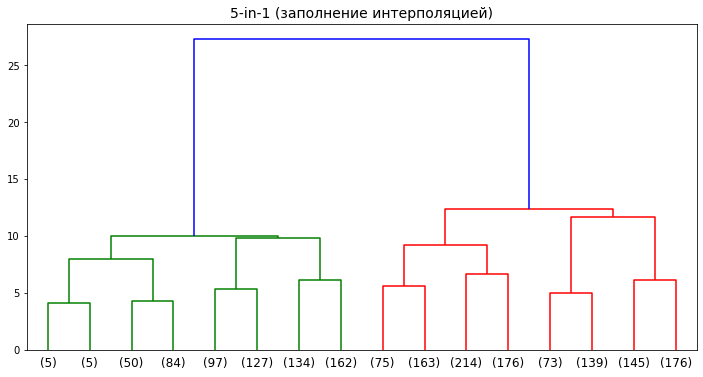

In [21]:
for i in range(5):
    model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
    model = model.fit(data[i].values)
    fig, ax = plt.subplots(figsize=(10,6))
    ax.set_title('Ванна '+bathNumber[i]+' (заполнение интерполяцией)', fontsize=14)
    plot_dendrogram(model, truncate_mode='level', p=3)
    plt.tight_layout()
    plt.savefig('report_v2/dendoClustersInterpolated'+str(bathNumber[i])+'.png', dpi=300, bbox_inches='tight')          
    plt.show()

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(data[5].values)
fig, ax = plt.subplots(figsize=(12,6))
ax.set_title('5-in-1 (заполнение интерполяцией)', fontsize=14)
plot_dendrogram(model, truncate_mode='level', p=3)
plt.savefig('report_v2/dendoClustersInterpolated5in1.png', dpi=300, bbox_inches='tight')  
plt.show()